<a href="https://www.kaggle.com/code/josealvaradoruiz/huffpost?scriptVersionId=99562619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*PADAWANES*: 

* PAULA VALLEJO VARGAS
* JOSE ARMANDO ALVARADO RUIZ

# **Tema 3. Algoritmo de Naive-Bayes**

**Entrega: CLASIFICACIÓN DE NOTICIAS (HUFFPOST)**


# **Descripción de la tarea**

###Contexto

Este conjunto de datos contiene alrededor de 200.000 titulares de noticias del año 2012 al 2018 obtenidos de HuffPost. El modelo entrenado en este conjunto de datos podría usarse para identificar etiquetas de artículos de noticias sin seguimiento o para identificar el tipo de lenguaje utilizado en diferentes artículos de noticias. 

Se trata de un documento JSON con las siguientes claves: 

* Category: se trata de la categoría del artículo y es nuestra variable a estimar 
* Headline: titular de la noticia del HuffPost 
* Authors: autores de los artículos 
* Link: url de la noticia 
* Short_description: resumen del artículo 
* Date: fecha del artículo 

Con estos datos debes generar un modelo con el algoritmo de Naive-Bayes que consiga clasificar artículos atendiendo a sus titulares.

Consideraciones:

El tema de scrapping-web se entiende dado en módulos anteriores.

Pasos acerca del modelo:

* Lectura del archivo JSON y conversión a Pandas Dataframe
Realizar el tratamiento de textos vistos en el tema 3 de este módulo.
* Aplicar NaiveBayes analizando diferentes valores de “Alpha”
* Evaluar el modelo y comentar los resultados

Pasos acerca del webscrapping:

* Recoger más de 20 títulos de artículos de cada categoría (WELLNESS, PARENTING, TRAVEL, BUSINESS y SPORTS)
* Aplicarles TF-IDF Vectorizer
* Realizar las predicciones con el modelo creado.
* Evaluar y comentar los resultados

### **Importación librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Carga de Datos y visualización general

In [2]:
json_file = '../input/huffpost-data/act_grupal_News_Category_Dataset_v2.json'
df = pd.read_json(json_file, lines=True)

df.head(5)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
df.shape

(200853, 6)

El dataset cuenta con 200853 registros y con 6 columnas.

In [4]:
df['category'].describe()

count       200853
unique          41
top       POLITICS
freq         32739
Name: category, dtype: object

Se cuenta con 41 categorias, las cuales la de mayor frecuencia es Politics con 32.739 artículos.

In [5]:
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

Seleccionaremos solo las categorias solicitadas:

In [6]:
categories = ['WELLNESS', 'PARENTING', 'TRAVEL', 'BUSINESS', 'SPORTS']
df_news = df[df.category.isin(categories)]

In [7]:
df_news.head(5)

,category,headline,authors,link,short_description,date
80,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...,Ron Dicker,https://www.huffingtonpost.com/entry/jets-chri...,“I never want to put restrictions on the speec...,2018-05-24
87,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...","David Shepardson and Jeff Mason, Reuters",https://www.huffingtonpost.com/entry/trump-aut...,The investigation could lead to new U.S. tarif...,2018-05-24
101,SPORTS,Trump Posthumously Pardons Boxer Jack Johnson,Lydia O'Connor,https://www.huffingtonpost.com/entry/trump-par...,The pardoning of the black heavyweight boxer i...,2018-05-24
126,TRAVEL,"14 Ways To Make Family Road Trips Easier, From...",Taylor Pittman,https://www.huffingtonpost.com/entry/family-ro...,Having waterproof covers on the seats is kind ...,2018-05-24
135,SPORTS,Anna Kournikova Dancing With Her Bouncing Baby...,Ron Dicker,https://www.huffingtonpost.com/entry/anna-kour...,The score is love-love.,2018-05-24


In [8]:
df_news.shape

(47212, 6)

Nuestro nuevo dataset queda con 47212 registros con 6 columnas. Ahora la distribución de noticias o artículos por cada una de estas categorias esta dado por:

In [9]:
df_news.category.value_counts()

WELLNESS     17827
TRAVEL        9887
PARENTING     8677
BUSINESS      5937
SPORTS        4884
Name: category, dtype: int64

Ahora vamos a seleccionar solo las columnas category, que es nuestra variable target y la columna Headline.

In [10]:
df_news = df_news[['category','headline']]

In [11]:
df_news.shape

(47212, 2)

Nuestro dataset final esta compuesto por 47212 registros y dos columnas.

In [12]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47212 entries, 80 to 200852
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  47212 non-null  object
 1   headline  47212 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


No contamos con valores nulos dentro de nuestro dataset.

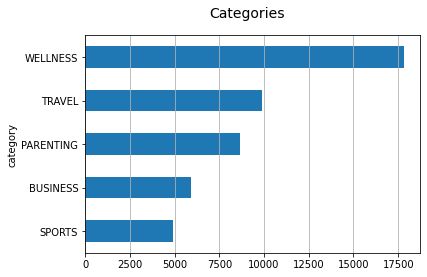

In [13]:
fig, ax = plt.subplots()
fig.suptitle("Categories", fontsize=14)
df_news["category"].reset_index().groupby("category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [14]:
df_news.category.value_counts()/len(df_news)

WELLNESS     0.377595
TRAVEL       0.209417
PARENTING    0.183788
BUSINESS     0.125752
SPORTS       0.103448
Name: category, dtype: float64

La data presenta un desbalance ya que la proporción de artículos "wellness" es bastante superior a las 4 otras categorias con un 37.7% de los registros. Además las categorias con menor cantidad de artículos son "Business" y "Sports" con un 12 y 10% respectivamente. 

# Tratamiento de Texto y aplicacion Naive-Bayes

Vamos a trabajar con la clase Pipeline de Scikit-learn para asi realizar varios trabajos de tratamiento de texto como de modelado utilizando dos algoritmos, Multinominal y ComplementNB, ambos basados en Naive-Bayes.

La clase Pipeline de Scikit-learn está diseñada como una forma manejable de aplicar una serie de transformaciones de datos seguidas por la aplicación de un estimador. En definitiva, esta sencilla herramienta es útil para:

* Conveniencia en la creación de un flujo de trabajo coherente y fácil de entender
* Aplicación de la implementación del flujo de trabajo y el orden deseado de las aplicaciones de paso
* Reproducibilidad
* Valor en la persistencia de objetos enteros del pipeline (va a la reproducibilidad y la conveniencia)

In [15]:
# Importación de librerias asociadas a tratamiento de texto y modelo Naive-Bayes

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns
from time import time
import datetime

In [16]:
# Seleccionamos la data de train y test. Para entrenar se utilizará el 80%, mientras 
# que se dejará 20% para testear.

train_df, test_df = train_test_split(df_news, test_size=0.2, random_state=123, stratify=df_news["category"])
train_data = train_df["headline"]
train_target = train_df["category"]
test_data = test_df["headline"]
test_target = test_df["category"]

El tamaño de cada uno de nuestros dataset:

In [17]:
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((37769,), (37769,), (9443,), (9443,))

Definimos nuestro Pipeline, indicandole los 3 pasos que queremos realizar:

* tfidf: Utilizaremos TfidfVectorizer que nos permitirá tokenizar documentos, aprender el vocabulario y las ponderaciones inversas de frecuencia de documentos, y nos permitirá codificar nuevos documentos.
* reduce_dim

In [18]:
pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("reduce_dim", TruncatedSVD(n_components=10)),
        ("classifier", ComplementNB()), #MultinominalNB() 
    ]
)

In [19]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'reduce_dim', 'classifier', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'reduce_dim__algorithm', 'reduce_dim__n_components', 'reduce_dim__n_iter', 'reduce_dim__random_state', 'reduce_dim__tol', 'classifier__alpha', 'classifier__class_prior', 'classifier__fit_prior', 'classifier__norm'])

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
nb_param_grid = {
    "reduce_dim": ["passthrough", TruncatedSVD(10), TruncatedSVD(20)],
    "tfidf__analyzer": ["word", "char"],
    "tfidf__smooth_idf": [True, False],
    "tfidf__ngram_range": [(1, 1), (1, 2),(2,2)],
    "tfidf__use_idf": [True, False],
    "tfidf__stop_words": [None, STOP_WORDS,"english"],
    "classifier__fit_prior": [True, False],
    "classifier__alpha": [0.1, 0.5, 1, 5, 10]
}

In [21]:
def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

start = time()
print("Fitting started...")
search = RandomizedSearchCV(pipeline, param_distributions=nb_param_grid, verbose=1)
search.fit(train_data, train_target)
end = time()
tiempo_train = segundos_a_minutos(int(end - start))
print(f"Tiempo de Entrenamiento {tiempo_train}")

Fitting started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de Entrenamiento 00:02:05


In [22]:
search.best_params_

{'tfidf__use_idf': True,
 'tfidf__stop_words': 'english',
 'tfidf__smooth_idf': False,
 'tfidf__ngram_range': (1, 1),
 'tfidf__analyzer': 'word',
 'reduce_dim': 'passthrough',
 'classifier__fit_prior': True,
 'classifier__alpha': 0.5}

In [23]:
model_nb = search.best_estimator_

In [24]:
accuracy_train_nb = round(model_nb.score(train_data,train_target),5)
accuracy_test_nb = round(model_nb.score(test_data,test_target),5)

print(f'Train Accuracy : {accuracy_train_nb}')
print(f'Test Accuracy  : {accuracy_test_nb}')

Train Accuracy : 0.90328
Test Accuracy  : 0.81605


In [25]:
y_pred = model_nb.predict(test_data)
cr = classification_report(test_target, y_pred)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.77      0.71      0.74      1187
   PARENTING       0.78      0.74      0.76      1735
      SPORTS       0.77      0.91      0.84       977
      TRAVEL       0.83      0.89      0.86      1978
    WELLNESS       0.85      0.83      0.84      3566

    accuracy                           0.82      9443
   macro avg       0.80      0.81      0.81      9443
weighted avg       0.82      0.82      0.81      9443



In [26]:
compare_model_nb = pd.DataFrame({'test_data' : test_target, 
                                'prediction_data': y_pred
                              })
compare_model_nb.sample(10)

,test_data,prediction_data
186097,WELLNESS,WELLNESS
187211,WELLNESS,WELLNESS
154648,PARENTING,TRAVEL
75220,SPORTS,SPORTS
51032,SPORTS,SPORTS
141318,TRAVEL,PARENTING
174976,PARENTING,PARENTING
65590,SPORTS,SPORTS
146383,WELLNESS,WELLNESS
141357,PARENTING,PARENTING


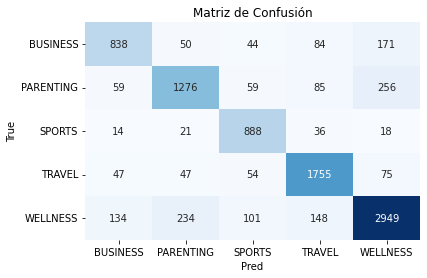

In [27]:
## Plot confusion matrix
classes = np.unique(test_target)
cm = confusion_matrix(test_target, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Matriz de Confusión")
plt.yticks(rotation=0)

plt.show()

# Tratamiento de texto

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vect = vectorizer.fit_transform(df_news["headline"].values)

In [31]:
vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df_tf.shape)
df_tf.head()

(47212, 26770)


,00,000,000th,007,01,012,013,014,02,080,...,zyberk,zylowska,zynga,zyola,zytiga,zzs,zzz,zzzs,élysées,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_tf.max(axis=1)

0        0.421677
1        0.403366
2        0.493686
3        0.439682
4        0.476555
           ...   
47207    0.492960
47208    0.411799
47209    0.396692
47210    0.423291
47211    0.434877
Length: 47212, dtype: float64

In [34]:
df_tf.idxmax(axis=1)

0         christopher
1              import
2        posthumously
3              easier
4          kournikova
             ...     
47207      investment
47208        azarenka
47209      improbable
47210           aldon
47211         hornets
Length: 47212, dtype: object

In [35]:
from sklearn.model_selection import train_test_split

X = df_tf.values
y = df_news["category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(37769, 26770) (37769,)
(9443, 26770) (9443,)


In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB(alpha=0.5) ## probar con 5 o 10
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
pred_test_prob = mnb_model.predict_proba(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))



Precisión sobre los datos de entrenamiento: 87.79
Precisión sobre los datos de test: 80.18


Accuracy: 0.8
Auc: 0.96
Detail:
              precision    recall  f1-score   support

    BUSINESS       0.91      0.55      0.69      1187
   PARENTING       0.82      0.66      0.73      1735
      SPORTS       0.93      0.75      0.83       977
      TRAVEL       0.87      0.86      0.86      1978
    WELLNESS       0.73      0.94      0.82      3566

    accuracy                           0.80      9443
   macro avg       0.85      0.75      0.79      9443
weighted avg       0.82      0.80      0.80      9443



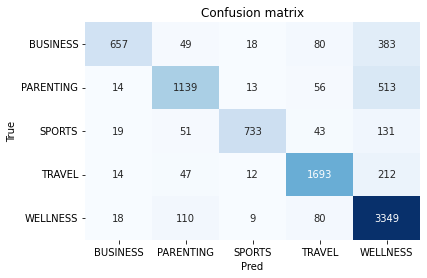

In [37]:
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, pred_test)
auc = roc_auc_score(y_test, pred_test_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(y_test, pred_test))
    
## Plot confusion matrix
cm = confusion_matrix(y_test, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

#fig, ax = plt.subplots(nrows=1, ncols=2)


plt.show()

In [38]:
import random
## select observation
for i in random.sample(range(0, 1000),20):
    txt_instance = df_news["headline"].iloc[i]
    ## check true value and predicted value
    print("Headline:", txt_instance,"\n True:", y_test[i], "| Prediction:", pred_test[i], "| Prob:", round(np.max(pred_test_prob[i]),2), "\n\n")


Headline: Jon Stewart Co-Hosts SportsCenter To Support Wounded Veteran Athletes 
 True: WELLNESS | Prediction: WELLNESS | Prob: 0.87 


Headline: Olympian Mirai Nagasu Reveals What It's Like To Compete On Her Period 
 True: TRAVEL | Prediction: TRAVEL | Prob: 0.9 


Headline: Simone Biles Expertly Claps Back After Being Called A Bad Role Model 
 True: WELLNESS | Prediction: WELLNESS | Prob: 0.81 


Headline: Uber Paid Hackers $100,000 To Keep A Massive Data Breach Quiet 
 True: WELLNESS | Prediction: WELLNESS | Prob: 0.54 


Headline: Take A Virtual Disney Vacation With Stunning New Google Street View Maps 
 True: BUSINESS | Prediction: WELLNESS | Prob: 0.36 


Headline: KB Home Cuts CEO's Annual Incentive Payment In Response To Vulgar Rant (UPDATE) 
 True: WELLNESS | Prediction: WELLNESS | Prob: 0.81 


Headline: Wheeling Around Tucson, Where Things Aren't Always What They Seem 
 True: PARENTING | Prediction: PARENTING | Prob: 0.46 


Headline: 3 Miami Dolphins Players Kneel During An